<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Create-a-netCDF4.Dataset-object" data-toc-modified-id="Create-a-netCDF4.Dataset-object-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a netCDF4.Dataset object</a></span></li><li><span><a href="#Access-a-netCDF-variable" data-toc-modified-id="Access-a-netCDF-variable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Access a netCDF variable</a></span></li><li><span><a href="#List-the-Dimensions" data-toc-modified-id="List-the-Dimensions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>List the Dimensions</a></span></li><li><span><a href="#What-is-the-sea-surface-temperature-at-50N,-140E?" data-toc-modified-id="What-is-the-sea-surface-temperature-at-50N,-140E?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What is the sea surface temperature at 50N, 140E?</a></span></li><li><span><a href="#Simple-visualization" data-toc-modified-id="Simple-visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Simple visualization</a></span></li><li><span><a href="#Closing-your-netCDF-file" data-toc-modified-id="Closing-your-netCDF-file-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Closing your netCDF file</a></span></li></ul></div>

In [1]:
# Uncomment the line below and run this cell to install the numpy-financial package
! pip install netCDF4

# Import libraries

In [15]:
import numpy as np
import netCDF4
import warnings
warnings.filterwarnings('ignore')

# Create a netCDF4.Dataset object

- **`f`** is an object, representing an open netCDF file.
- printing the object gives you summary information.
- the **`variables`** attribute of **`f`** is a dictionary containing netcdf variable objects.

In [16]:
f = netCDF4.Dataset('tos_O1_2001-2002.nc', 'r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

# Access a netCDF variable

- variable objects stored by name in **`variables`** dict.
- print the variable yields summary info (including all the attributes).
- no actual data read yet (just have a reference to the variable object with metadata).

In [20]:
sea_surf_temp = f.variables['tos']  # sea surface temperature variable
print(sea_surf_temp)

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on


# List the Dimensions

- All variables in a netCDF file have an associated shape, specified by a list of dimensions.
- Let's list all the dimensions in this netCDF file.

In [21]:
for dname, d in f.dimensions.items():
    print(d)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2


Each variable has a **`dimensions`** and a **`shape`** attribute.

In [22]:
sea_surf_temp.dimensions

('time', 'lat', 'lon')

In [23]:
sea_surf_temp.shape

(24, 170, 180)

# What is the sea surface temperature at 50N, 140E?

In [24]:
lat = f.variables['lat']
lon = f.variables['lon']

In [28]:
latvals = lat[:]; lonvals = lon[:] # extract lat/lon values (in degrees) to numpy arrays
latvals, lonvals

(masked_array(data=[-79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
                    -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5,
                    -63.5, -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5,
                    -55.5, -54.5, -53.5, -52.5, -51.5, -50.5, -49.5, -48.5,
                    -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
                    -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5,
                    -31.5, -30.5, -29.5, -28.5, -27.5, -26.5, -25.5, -24.5,
                    -23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5,
                    -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,
                     -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
                      0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
                      8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,
                     16.5,  17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,
            

In [40]:
lat_diff_sq = (latvals-50)**2
lon_diff_sq = (lonvals-140)**2
print(np.argmin(lat_diff_sq), np.argmin(lon_diff_sq))

129 69


In [41]:
sea_surf_temp[:].data[0, 129, 69]

1e+20

# Simple visualization

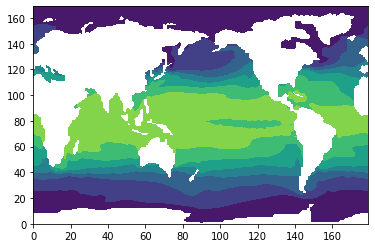

In [46]:
import matplotlib.pyplot as plt
cs = plt.contourf(sea_surf_temp[23,:,:])

# Closing your netCDF file

It's good to close netCDF files, but not actually necessary when Dataset is open for read access only.

In [13]:
# f.close()